In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
data = pd.read_csv("Cardio Data.csv")

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# checking the shape
data.shape

(70000, 13)

In [7]:
# checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
# describing the data
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# checking the null values
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

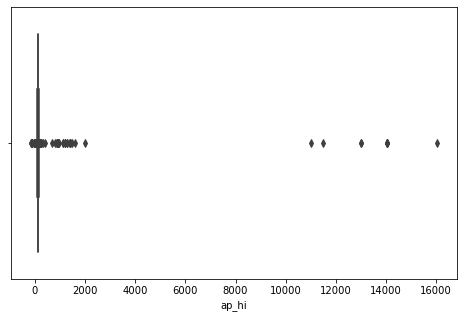

In [10]:
# outliers in ap_hi
plt.figure(figsize=(8,5))
sns.boxplot(x=data["ap_hi"])
plt.show()

- few of the patient are having Systolic blood pressure 

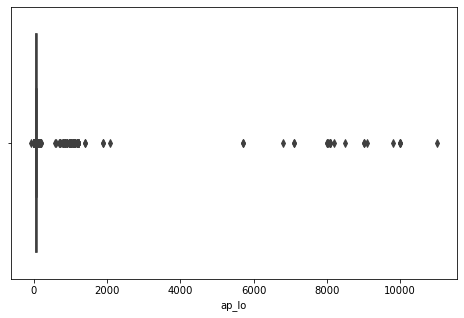

In [11]:
# ouliers in ap_lo
plt.figure(figsize=(8,5))
sns.boxplot(data["ap_lo"])
plt.show()

- some are the patient are having Diastolic blood pressure

In [12]:
data.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0


In [13]:
# converting the gender and cardio to categorical
data.gender = data.gender.replace([1,2],["Male","Female"])
data.cardio = data.cardio.replace([1,0],["Yes","No"])

In [14]:
data["gender"].value_counts()

Male      45530
Female    24470
Name: gender, dtype: int64

In [15]:
data["cardio"].value_counts()

No     35021
Yes    34979
Name: cardio, dtype: int64

In [16]:
# converting the type to str
data.gender = data.gender.astype("str")
data.cardio = data.cardio.astype("str")

In [17]:
# which gender are having cardiac disorder % wise
data.groupby("gender")["cardio"].value_counts()

gender  cardio
Female  Yes       12363
        No        12107
Male    No        22914
        Yes       22616
Name: cardio, dtype: int64

In [18]:
data.groupby("gender")["cardio"].value_counts(normalize=True).mul(100).round(1).astype(str)+"%"

gender  cardio
Female  Yes       50.5%
        No        49.5%
Male    No        50.3%
        Yes       49.7%
Name: cardio, dtype: object

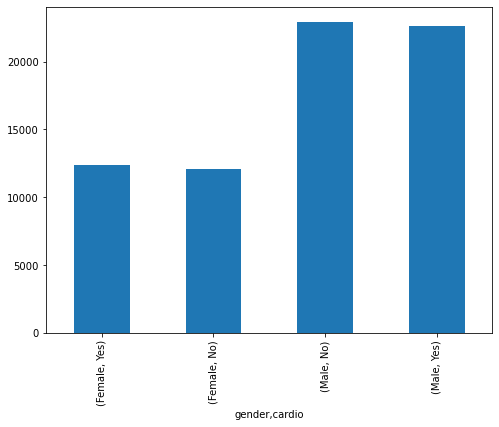

In [19]:
plt.figure(figsize=(8,6))
data.groupby("gender")["cardio"].value_counts().plot(kind="bar")
plt.show()

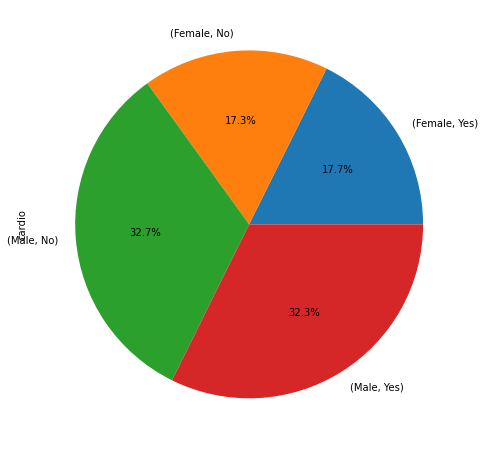

In [20]:
plt.figure(figsize=(15,8))
data.groupby("gender")["cardio"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

- from our whole data 17.7% female suffering and 32.3% men are suffering from cardiac diseases
- we have 12363 females out of 24470 who are total 50.52% of all female candidate suffering with the cardiac disorder
- and its exactly opposite with the men having 49.67% with figure of 22616 out of 45530

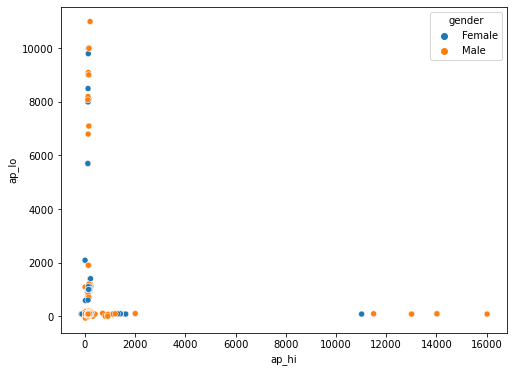

In [21]:
# Find out and visualize the correlation between ap_hi and ap_lo for both the genders 
plt.figure(figsize=(8,6))
sns.scatterplot(x="ap_hi",y="ap_lo",data=data,hue="gender")
plt.show()

- if the Systolic blood pressure of patient is high then its distoltic blood pressure is low as they are having correlation of 0.01 and vice a versa

In [22]:
data.loc[:,["ap_hi","ap_lo"]].corr()

,ap_hi,ap_lo
ap_hi,1.000000,0.016086
ap_lo,0.016086,1.000000


In [23]:
# which age group is the most affected group of cardiac diseases 
data["age"] = (data["age"]/365).astype(int)

In [24]:
data["age"].head()

0    50
1    55
2    51
3    48
4    47
Name: age, dtype: int32

In [25]:
x = data[((data["age"]) & (data["cardio"]=="Yes"))][["age"]]

<Figure size 720x576 with 0 Axes>

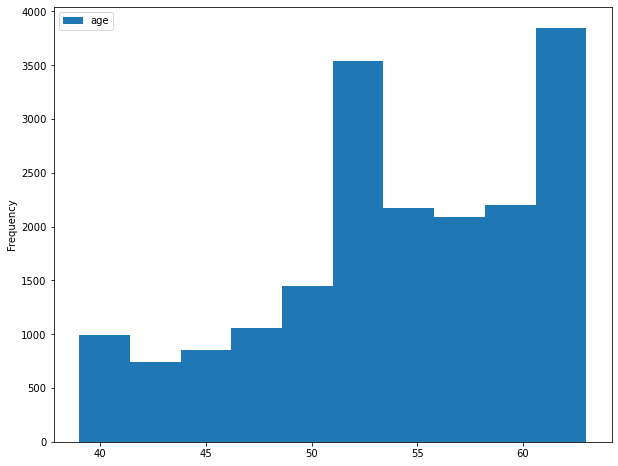

In [26]:
plt.figure(figsize=(10,8))
x.plot.hist(bins=10)
plt.show()

- according to the chart the most affected group of cardiac diseases is from age 50 to 63

In [27]:
# Finding out the % of patients having cardiac disorder with ap_hi and weight more than their respective means 
h_w = data[((data.weight > data.weight.mean()) & (data.cardio == "Yes") & (data.ap_hi > data.ap_hi.mean()))]["id"].count()

In [28]:
y = data.id.count()

In [29]:
(h_w/y)*100

17.844285714285714

- approximately 18% patients we have with us who are having their weight and ap_hi more than average of the all patients

In [30]:
data.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,Female,168,62.0,110,80,1,1,0,0,1,No


In [31]:
# for better analysis replacing cholesterol values to categorical
data.cholesterol = data.cholesterol.replace([1,2,3],["Normal","Slightly_above_normal","High cholesterol"])

In [32]:
data.cholesterol = data.cholesterol.astype("str")

In [33]:
# Finding the category of cholesterol that has the highest number of cardiac patients
data["cholesterol"].value_counts()

Normal                   52385
Slightly_above_normal     9549
High cholesterol          8066
Name: cholesterol, dtype: int64

In [34]:
# according percent wise
data["cholesterol"].value_counts(normalize=True)*100

Normal                   74.835714
Slightly_above_normal    13.641429
High cholesterol         11.522857
Name: cholesterol, dtype: float64

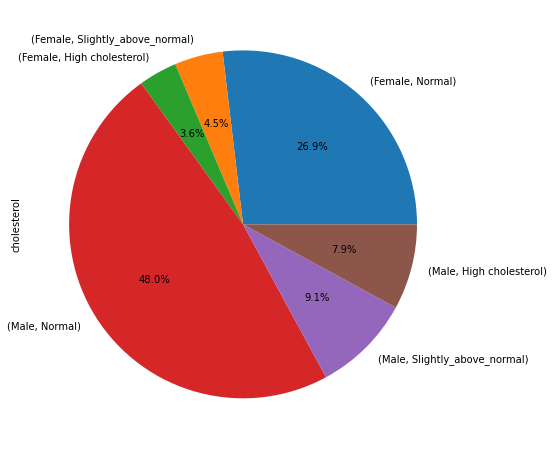

In [35]:
# percentage of males and females in the cholesterol category by pie chart
plt.figure(figsize=(9,8))
data.groupby("gender")["cholesterol"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

- we have 74% patient with normal cholesterol and only 11% with high cholesterol
- From above chart as per gender 3.6% female and 7.9% males are having high cholesterol

In [36]:
# Finding out the % of the patients having cardiac disorders with age greater than 45
a_c = data[((data["age"]>45) & (data["cardio"]=="Yes"))]["id"].count()

In [37]:
(a_c/y)*100

44.388571428571424

- .44.38% patients are of age greater than 45 are having cardiac disorder

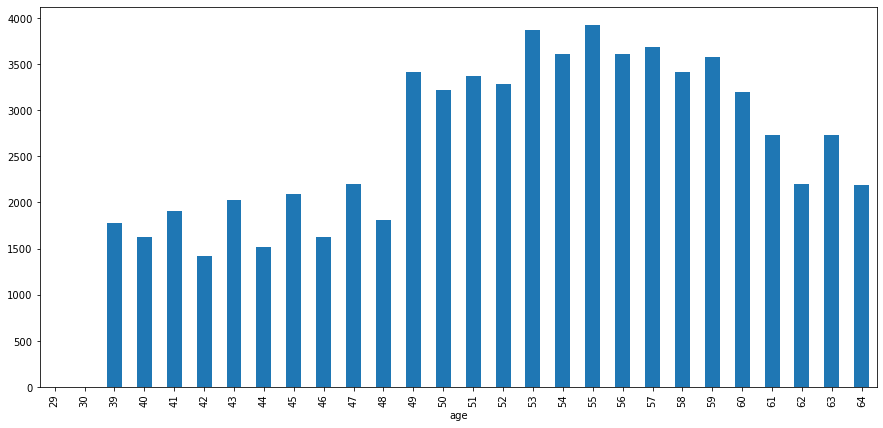

In [38]:
plt.figure(figsize=(15,7))
data.groupby("age")["cardio"].count().plot(kind="bar")
plt.show()

- people from age group of 49 to 63 have high amount of cardiac disorder

In [39]:
# finding out mean of height and weight
data["height"].mean()

164.35922857142856

In [40]:
data["weight"].mean()

74.20569

In [41]:
# converting the height to less than or greater than its mean to short and big
height_ratio = []

for i in data["height"]:
    if (i < data.height.mean()):
        height_ratio.append("short")
    else:
        height_ratio.append("big")

In [42]:
data["height_ratio"] = height_ratio

In [43]:
# converting the weight to less than or greater than its mean to less and more
weight_ratio = []

for i in data["weight"]:
    if (i < data.weight.mean()):
        weight_ratio.append("less")
    else:
        weight_ratio.append("more")

In [44]:
data["weight_ratio"] = weight_ratio

In [45]:
data["height_ratio"].value_counts()

big      35574
short    34426
Name: height_ratio, dtype: int64

In [46]:
data["weight_ratio"].value_counts()

less    39697
more    30303
Name: weight_ratio, dtype: int64

In [47]:
# Short height and less weight
a = data[(data["height_ratio"]=="short") & (data["weight_ratio"]=="less")]["id"].count()

In [48]:
(a/y)*100

31.698571428571427

In [49]:
# Big height and more weight
b = data[(data["height_ratio"]=="big") & (data["weight_ratio"]=="more")]["id"].count()

In [50]:
(b/y)*100

25.80857142857143

In [51]:
# Short height and more weight
c = data[(data["height_ratio"]=="short") & (data["weight_ratio"]=="more")]["id"].count()

In [52]:
(c/y)*100

17.481428571428573

In [53]:
# Big height and less weight
d = data[(data["height_ratio"]=="big") & (data["weight_ratio"]=="less")]["id"].count()

In [54]:
(d/y)*100

25.011428571428574

In [55]:
# finding out which gender smokes most
# 1-Smoke , 0 -No-smoking
data.groupby("gender")["smoke"].value_counts()

gender  smoke
Female  0        19114
        1         5356
Male    0        44717
        1          813
Name: smoke, dtype: int64

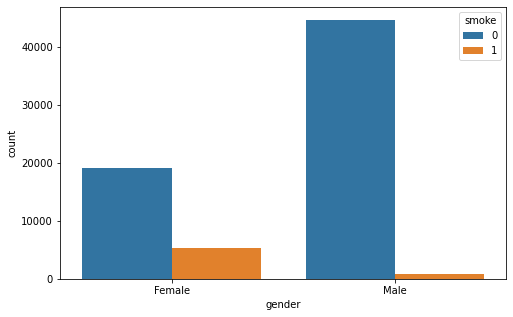

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x="gender",hue="smoke",data=data)
plt.show()

- from above chart (5356)Females are smoking more ,than (813)males

In [57]:
# which age of female smokes more
f_s = data[((data["gender"]=="Female") & (data["age"]) & (data["smoke"]==1))]["age"].value_counts().sort_values(ascending=True)

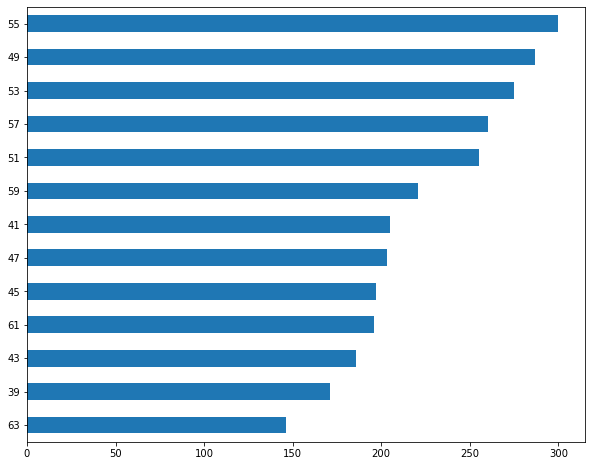

In [58]:
plt.figure(figsize=(10,8))
f_s.plot(kind="barh")
plt.show()

- Females which are age of 55 smokes more

In [59]:
# alcohol : 1 = Drinks alcohol , 0 = Does not drink alcohol.
data["alco"].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [60]:
# finding out which gender consume alcohol most
data.groupby("gender")["alco"].value_counts()

gender  alco
Female  0       21867
        1        2603
Male    0       44369
        1        1161
Name: alco, dtype: int64

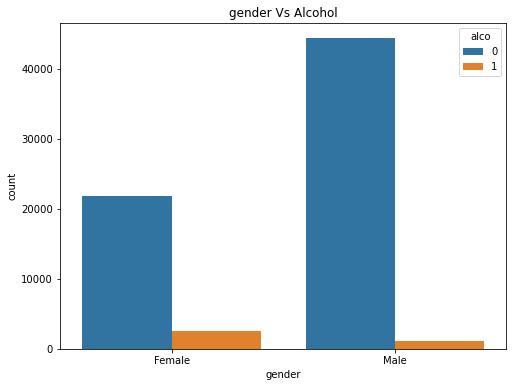

In [61]:
plt.figure(figsize=(8,6))
sns.countplot(x="gender",hue="alco",data=data)
plt.title("gender Vs Alcohol")
plt.show()

- as per gender, 2603 females consume more alcohol , than 1161 males

In [62]:
# at which age females consume more alochol
f_a = data[((data["gender"]=="Female") & (data["age"]) & (data["alco"]==1))]["age"].value_counts().sort_values(ascending=True)

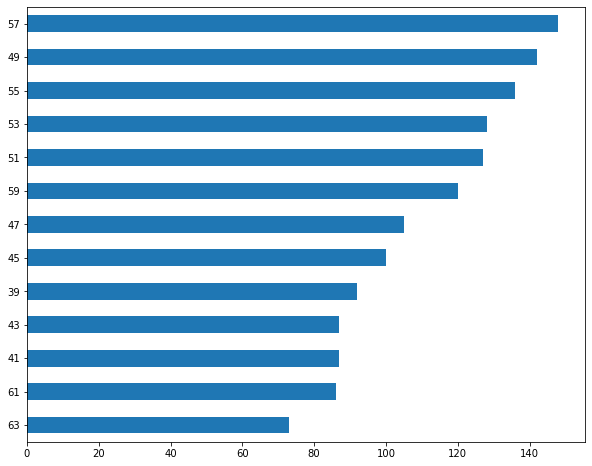

In [63]:
plt.figure(figsize=(10,8))
f_a.plot(kind="barh")
plt.show()

Most Females from Age 57 drinks lots of alcohol

In [64]:
data.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_ratio,weight_ratio
0,0,50,Female,168,62.0,110,80,Normal,1,0,0,1,No,big,less


In [65]:
# finding out which gender have no cardiac disorder and also he/she is fit
data.groupby(["gender","cardio","active"])["age"].count()

gender  cardio  active
Female  No      0          2113
                1          9994
        Yes     0          2612
                1          9751
Male    No      0          4265
                1         18649
        Yes     0          4749
                1         17867
Name: age, dtype: int64

In [66]:
g_c_a1 = data[((data["gender"]=="Female") & (data["cardio"]=="No") & (data["active"]==1))]["age"].count()

In [67]:
g_c_a2 = data[((data["gender"]=="Male") & (data["cardio"]=="No") & (data["active"]==1))]["age"].count()

In [68]:
table = pd.DataFrame([g_c_a1,g_c_a2])

In [69]:
table.columns = ["active"]
table.index = ["Female","Male"]
table

,active
Female,9994
Male,18649


- Females that are active and having no cardiac diseases are 9994
- Males that are active and having no cardiac diseases are 18649

In [70]:
data.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_ratio,weight_ratio
0,0,50,Female,168,62.0,110,80,Normal,1,0,0,1,No,big,less


<Figure size 720x576 with 0 Axes>

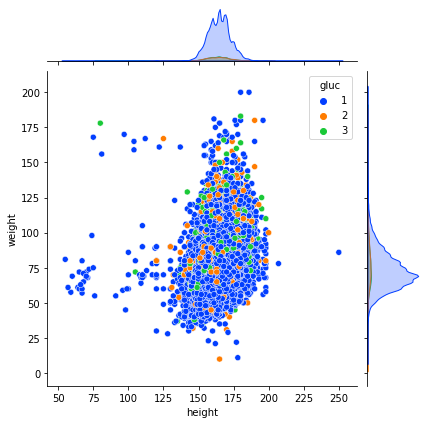

In [71]:
# According to height and weight checking the sugar level criteria
# gluco: 1 = Normal , 2 = Slightly above normal , 3 = High sugar level
plt.figure(figsize=[10,8])
sns.jointplot(x="height",y="weight",hue="gluc",data=data,palette="bright")
plt.show()

- As from above chart most of the blood sugar level comes under in weight 25 to 175kg and height 125 to 200cm 

In [72]:
# finding out age who has how much sugar level
data.groupby(["gluc","cardio"])[["age"]].count()

age
gluc cardio       
1    No      30894
     Yes     28585
2    No       2112
     Yes      3078
3    No       2015
     Yes      3316

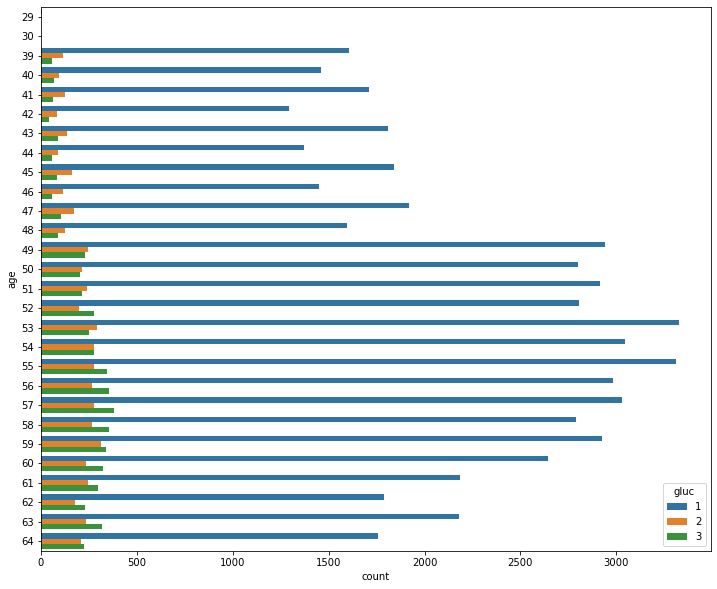

In [73]:
plt.figure(figsize=[12,10])
sns.countplot(y="age",hue="gluc",data=data)
plt.show()

- Most of the patients are having sugar but at normal level
- And from age 49 to 64 are having slightly above normal sugar level and also High sugar level patients

In [74]:
# for better correlation changing chol objects to int
data["cholesterol"] = data.cholesterol.replace(["Normal","Slightly_above_normal","High cholesterol"],[1,2,3])

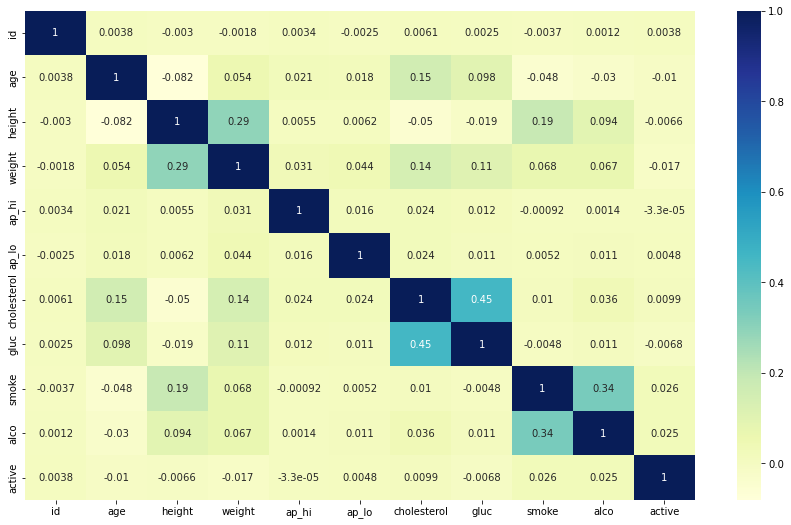

In [75]:
# checking the correlation
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.show()

Smoke and cholesterol are important factors